In [18]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv('/content/drive/MyDrive/Real estate valuation data set.csv')
data.shape

(414, 8)

In [21]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop(labels=['Y house price of unit area'], axis = 1),
    data['Y house price of unit area'], # jsut the target
    test_size = 0.3,
    random_state=1
)

X_train.shape, X_test.shape, Y_train.shape , Y_test.shape

((289, 7), (125, 7), (289,), (125,))

In [23]:
Y_train, Y_test

(274    41.0
 271    26.5
 98     51.0
 69     42.0
 378    37.4
        ... 
 255    17.4
 72     36.3
 396    31.9
 235    39.3
 37     25.3
 Name: Y house price of unit area, Length: 289, dtype: float64, 388    27.3
 102    54.4
 187    22.0
 162    11.6
 90     45.4
        ... 
 323    42.5
 73     20.0
 238    40.6
 273    29.3
 364    33.1
 Name: Y house price of unit area, Length: 125, dtype: float64)

In [24]:
#RMSE
def RMSE(x, y):
  w1 = len(x)*(x*y).sum() - (x.sum()*y.sum())
  w1 = w1 / (len(x)*(x**2).sum() - (x.sum()**2))
  
  w0 = (y.sum()/len(x)) - w1*(x.sum()/len(x))

  fx = w0 + w1*x

  RMSE = (((y-fx)**2).sum()/len(x))**0.5

  print('RMSE = ', RMSE)
  print('w0 = ', w0)
  print('w1 = ', w1)
  print('f(x) = ', fx)
  
  return RMSE, w0, w1


In [25]:
def RMSE2(x, y):
  w1 = len(x)*(x*y).sum() - (x.sum()*y.sum())
  w1 = w1 / (len(x)*(x**2).sum() - (x.sum()**2))
  
  w0 = (y.sum()/len(x)) - w1*(x.sum()/len(x))

  fx = w0 + w1*x

  RMSE = (((y-fx)**2).sum()/len(x))**0.5
  
  return RMSE

In [26]:
RMSE(X_train['X2 house age'], Y_train)

RMSE =  12.546587312263501
w0 =  42.22507184595252
w1 =  -0.23724887304825912
f(x) =  274    35.700728
271    38.025767
98     38.334190
69     39.259461
378    33.375689
         ...    
255    34.751732
72     34.514483
396    33.423139
235    39.164561
37     39.378085
Name: X2 house age, Length: 289, dtype: float64


(12.546587312263501, 42.22507184595252, -0.23724887304825912)

In [27]:
def RMSE_test(x, y, w0, w1):
  fx = w0+w1*x

  RMSE = (((y-fx)**2).sum()/len(x))**0.5
  
  print('RMSE = ', RMSE)
  print('f(x) = ', fx)

  return  RMSE

In [28]:
def RMSE_test2(x, y, w0, w1):
  fx = w0+w1*x

  RMSE = (((y-fx)**2).sum()/len(x))**0.5

  return  RMSE

In [29]:
print('Part of the X_train')
print('_____________________________________________')
print('X1 transaction data')
RMSE_x1, w0_x1, w1_x1 = RMSE(X_train['X1 transaction date'], Y_train)

print('\nX2 house age')
RMSE_x2, w0_x2, w1_x2 = RMSE(X_train['X2 house age'], Y_train)

print('\nX3 distance to the nearest MRT station')
RMSE_x3, w0_x3, w1_x3 = RMSE(X_train['X3 distance to the nearest MRT station'], Y_train)

print('\nX4 number of convenience stores')
RMSE_x4, w0_x4, w1_x4 = RMSE(X_train['X4 number of convenience stores'], Y_train)

print('\nX5 latitude')
RMSE_x5, w0_x5, w1_x5 = RMSE(X_train['X5 latitude'], Y_train)

print('\nX6 longitude')
RESE_x6, w0_x6, w1_x6 = RMSE(X_train['X6 longitude'], Y_train)


Part of the X_train
_____________________________________________
X1 transaction data
RMSE =  12.827799859501841
w0 =  -4118.271358067979
w1 =  2.064510727436249
f(x) =  274    37.933510
271    37.417382
98     38.449637
69     37.243963
378    38.276218
         ...    
255    38.449637
72     38.792346
396    36.901254
235    37.072609
37     37.933510
Name: X1 transaction date, Length: 289, dtype: float64

X2 house age
RMSE =  12.546587312263501
w0 =  42.22507184595252
w1 =  -0.23724887304825912
f(x) =  274    35.700728
271    38.025767
98     38.334190
69     39.259461
378    33.375689
         ...    
255    34.751732
72     34.514483
396    33.423139
235    39.164561
37     39.378085
Name: X2 house age, Length: 289, dtype: float64

X3 distance to the nearest MRT station
RMSE =  9.421677198388153
w0 =  45.42756563384703
w1 =  -0.0070154802565631415
f(x) =  274    42.663345
271    42.259081
98     43.397813
69     41.484974
378    41.303251
         ...    
255     6.757972
72     

In [30]:
print('Part of the X_test')
print('_____________________________________________')
print('X1 transaction data')
RMSE_x1 = RMSE_test(X_test['X1 transaction date'], Y_test, w0_x1, w1_x1)

print('\nX2 house age')
RMSE_x2 = RMSE_test(X_test['X2 house age'], Y_test, w0_x2, w1_x2)

print('\nX3 distance to the nearest MRT station')
RMSE_x3 = RMSE_test(X_test['X3 distance to the nearest MRT station'], Y_test, w0_x3, w1_x3)

print('\nX4 number of convenience stores')
RMSE_x4 = RMSE_test(X_test['X4 number of convenience stores'], Y_test, w0_x4, w1_x4)

print('\nX5 latitude')
RMSE_x5 = RMSE_test(X_test['X5 latitude'], Y_test, w0_x5, w1_x5)

print('\nX6 longitude')
RMSE_x6 = RMSE_test(X_test['X6 longitude'], Y_test, w0_x6, w1_x6)



Part of the X_test
_____________________________________________
X1 transaction data
RMSE =  15.093358084658115
f(x) =  388    38.620992
102    37.760091
187    37.588736
162    37.072609
90     37.243963
         ...    
323    38.449637
73     37.933510
238    37.760091
273    38.449637
364    38.449637
Name: X1 transaction date, Length: 125, dtype: float64

X2 house age
RMSE =  14.856472126361403
f(x) =  388    39.757684
102    41.964098
187    40.113557
162    38.429090
90     42.225072
         ...    
323    35.439754
73     38.951037
238    39.188286
273    39.093387
364    33.850187
Name: X2 house age, Length: 125, dtype: float64

X3 distance to the nearest MRT station
RMSE =  11.371156046883126
f(x) =  388    29.629139
102    44.069477
187    23.832683
162    16.898505
90     43.505223
         ...    
323    44.044577
73     16.790270
238    40.286251
273    44.234030
364    41.119083
Name: X3 distance to the nearest MRT station, Length: 125, dtype: float64

X4 number of conv

Text(0.5, 0.98, 'RMSE')

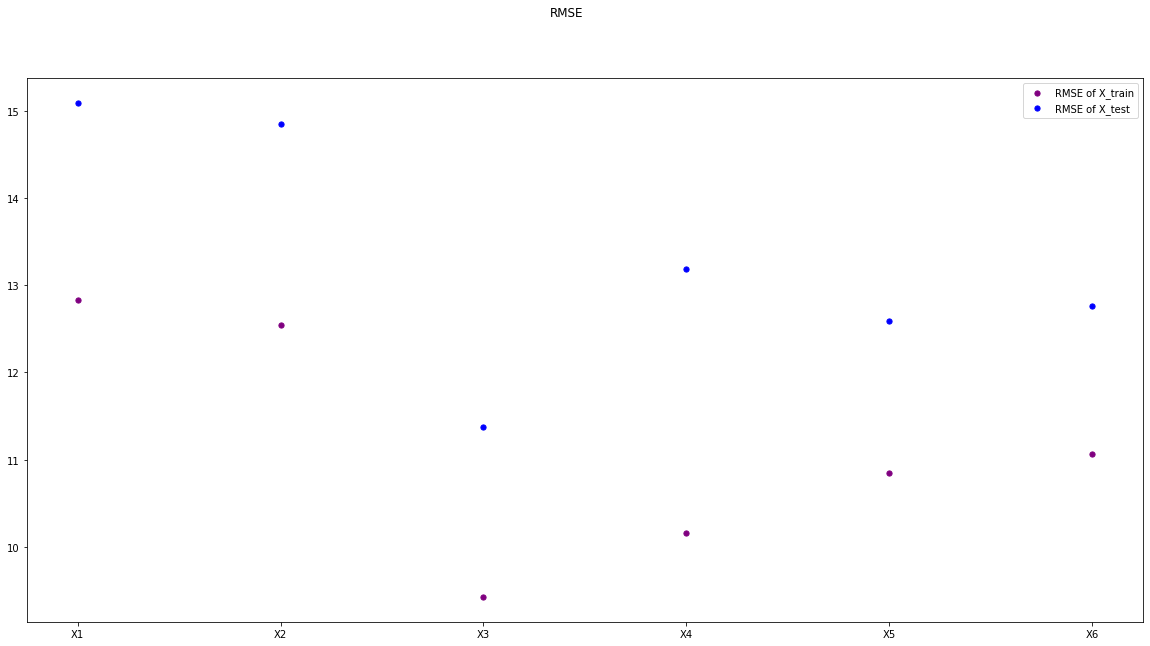

In [31]:
data = {'X1' : RMSE2(X_train['X1 transaction date'], Y_train),
        'X2' : RMSE2(X_train['X2 house age'], Y_train),
        'X3' : RMSE2(X_train['X3 distance to the nearest MRT station'], Y_train),
        'X4' : RMSE2(X_train['X4 number of convenience stores'], Y_train),
        'X5' : RMSE2(X_train['X5 latitude'], Y_train),
        'X6' : RMSE2(X_train['X6 longitude'], Y_train)}

data2 = {'X1' : RMSE_test2(X_test['X1 transaction date'], Y_test, w0_x1, w1_x1),
         'X2' : RMSE_test2(X_test['X2 house age'], Y_test, w0_x2, w1_x2),
         'X3' : RMSE_test2(X_test['X3 distance to the nearest MRT station'], Y_test, w0_x3, w1_x3),
         'X4' : RMSE_test2(X_test['X4 number of convenience stores'], Y_test, w0_x4, w1_x4),
         'X5' : RMSE_test2(X_test['X5 latitude'], Y_test, w0_x5, w1_x5),
         'X6' : RMSE_test2(X_test['X6 longitude'], Y_test, w0_x6, w1_x6)}

names = list(data.keys())
names2 = list(data2.keys())

values = list(data.values())
values2 = list(data2.values())

fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=True)
axs.scatter(names, values, s = 27, c = 'purple', label = "RMSE of X_train")
axs.scatter(names2, values2, s = 27, c ='b', label = "RMSE of X_test")
axs.legend()
fig.suptitle('RMSE')

In [32]:
# 上傳.ipynb檔
from matplotlib.cbook import print_cycles
from google.colab import files
upload = files.upload()
for filename in upload.keys():
  print('file"{name}"'.format(name = filename))

Saving Untitled2.ipynb to Untitled2 (1).ipynb
file"Untitled2.ipynb"


In [33]:
# .ipynb檔轉換成.html檔
!jupyter nbconvert --to html *.ipynb

[NbConvertApp] Converting notebook Untitled2 (1).ipynb to html
[NbConvertApp] Writing 343418 bytes to Untitled2 (1).html
[NbConvertApp] Converting notebook Untitled2.ipynb to html
[NbConvertApp] Writing 346841 bytes to Untitled2.html


In [34]:
# 將轉換好的檔案下載
files.download(filename[:-5]+'html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>